#Roshan Kumar Yadav
#21070126130
#AIML B3

#Using Kaggle API Loading Dataset

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [3]:
!kaggle datasets download -d devchauhan1/salary-datacsv

  0% 0.00/378 [00:00<?, ?B/s]
100% 378/378 [00:00<00:00, 291kB/s]


In [5]:
!unzip /content/salary-datacsv.zip

Archive:  /content/salary-datacsv.zip
  inflating: Salary_Data.csv         


In [23]:
!kaggle datasets download -d farhanmd29/position-salaries

  0% 0.00/333 [00:00<?, ?B/s]
100% 333/333 [00:00<00:00, 333kB/s]


In [24]:
!unzip /content/position-salaries.zip

Archive:  /content/position-salaries.zip
  inflating: Position_Salaries.csv   


## Importing the libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
sns.set_theme(style='ticks')

## Years of Experience

In [9]:
df_experience = pd.read_csv('/content/Salary_Data.csv')

In [10]:
df_experience.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [11]:
df_experience.shape

(30, 2)

In [12]:
df_experience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [13]:
df_experience.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [14]:
df_experience.isna().sum(axis=0)

YearsExperience    0
Salary             0
dtype: int64

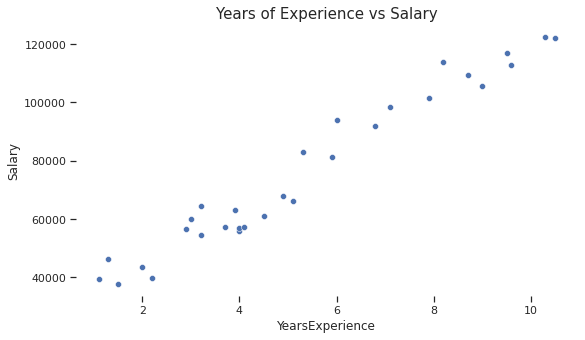

In [15]:
plt.figure(figsize=(9,5))
sns.scatterplot(x = 'YearsExperience', y= 'Salary',data = df_experience,palette='vlag')
plt.title("Years of Experience vs Salary", fontsize=15)
sns.despine(left=True,bottom=True)

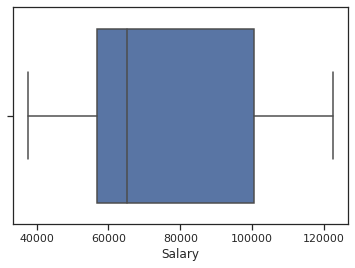

In [17]:
sns.boxplot(df_experience['Salary'])

## Preparing and fitting the model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
X = df_experience[['YearsExperience']]
y = df_experience[['Salary']]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

The training score is : 0.9395413526983522
The testing score is : 0.9779208335417602
The R2 score is :0.9779208335417602
The RMSE value is 4733.70258289858
[[83264.95426841]]
[[64505.53328452]
 [47622.05439902]]


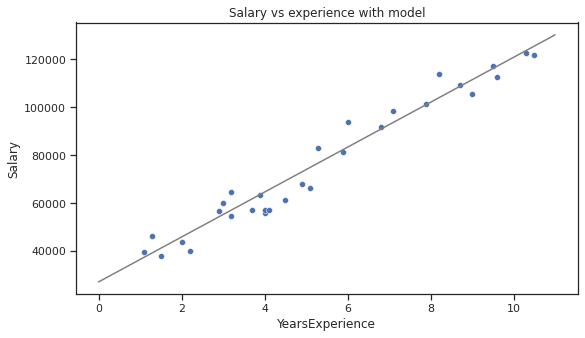

In [21]:
def linear_regression():
  lr = LinearRegression() # Instanciating the module
  lr.fit(X_train,y_train) # Fitting the data

  predicted_values = lr.predict(X_test) # Predicting the data
  print(f"The training score is : {lr.score(X_train,y_train)}")
  print(f"The testing score is : {lr.score(X_test,y_test)}")


  score = r2_score(y_test,predicted_values)
  rmse = mean_squared_error(y_test,predicted_values,squared=False)

  print(f"The R2 score is :{score}")
  print(f"The RMSE value is {rmse}")

  # Plotting the model
  plt.figure(figsize=(9,5))
  x = np.linspace(0,11,100)
  f_x = (lr.coef_ * x + lr.intercept_).ravel()
  sns.lineplot(x = x,y = f_x,color='grey');
  sns.scatterplot(x = X['YearsExperience'],y = y['Salary'])
  plt.title("Salary vs experience with model")

  # Predicting the salary based on the experience
  print(lr.predict([[6]]))

  print(lr.predict([[4],
               [2.2]]))
  
linear_regression()

## Position

In [25]:
df_position = pd.read_csv('/content/Position_Salaries.csv')

In [26]:
df_position.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [27]:
df_position.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [28]:
df_position.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


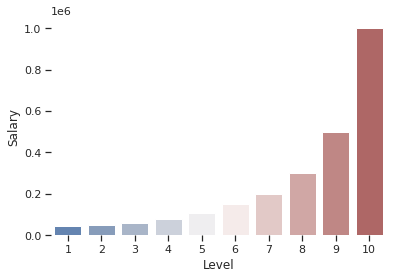

In [29]:
sns.barplot(x='Level',y='Salary',data=df_position,palette='vlag')
sns.despine(left=True, bottom=True)

In [30]:
# Seperating the features and target variables
X = df_position[['Level']]
y = df_position[['Salary']]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

The training score is : 0.6310028824447103
The testing score is : 0.8588877328994488
The R2 score is :0.8588877328994488
The RMSE value is 73888.27256549199


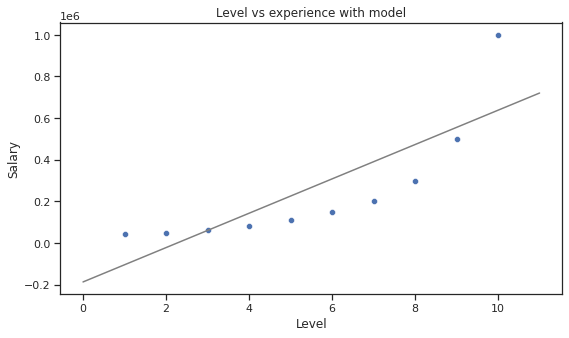

In [32]:
def linearRegression():
  lr = LinearRegression().fit(X_train,y_train)

  print(f"The training score is : {lr.score(X_train,y_train)}")
  print(f"The testing score is : {lr.score(X_test,y_test)}")

  predicted_values = lr.predict(X_test)

  score = r2_score(y_test,predicted_values)
  rmse = mean_squared_error(y_test,predicted_values,squared=False)
  print(f"The R2 score is :{score}")
  print(f"The RMSE value is {rmse}")

  # Plotting the model
  plt.figure(figsize=(9,5))
  x = np.linspace(0,11,100)
  f_x = (lr.coef_ * x + lr.intercept_).ravel()
  sns.lineplot(x = x,y = f_x,color='grey');
  sns.scatterplot(x = X['Level'],y = y['Salary'])
  plt.title("Level vs experience with model")

linearRegression()

## Polynomial Regression

The training score is : 0.9921802783221522
The testing score is : 0.890111940774395
The R2 score is :0.890111940774395
The RMSE value is 65203.120428358874


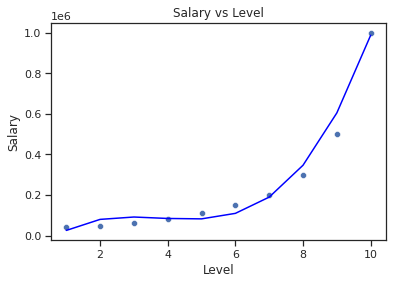

In [33]:
def polylnomialRegression():

  from sklearn.preprocessing import PolynomialFeatures
  features = PolynomialFeatures(degree=3) # Creating polynomial Features
  X_train_poly = features.fit_transform(X_train) # Training the polynomial Features
  X_test_poly = features.transform(X_test) # Testing the polynomial Features

  lr_2 = LinearRegression().fit(X_train_poly,y_train) # Fitting the model

  # Plotting the data
  sns.scatterplot(x = X['Level'],y = y['Salary'])
  plt.plot(X, lr_2.predict(features.fit_transform(X)), color="blue")  
  plt.title("Salary vs Level")

  print(f"The training score is : {lr_2.score(X_train_poly,y_train)}")
  print(f"The testing score is : {lr_2.score(X_test_poly,y_test)}")

  score = r2_score(y_test,lr_2.predict(X_test_poly))
  rmse = mean_squared_error(y_test,lr_2.predict(X_test_poly),squared=False)
  print(f"The R2 score is :{score}")
  print(f"The RMSE value is {rmse}")

polylnomialRegression()